In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [65]:
# Load data to a dataframe
df = pd.read_csv('data.csv')

# Learn the size of the dataset
df.shape

(110527, 14)

In [66]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [67]:
df.columns


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [68]:
df.head(5)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [69]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [70]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
df['AppointmentDay'].head(1)

0    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object

In [10]:
df['ScheduledDay'].head(1)

0    2016-04-29T18:38:08Z
Name: ScheduledDay, dtype: object

In [11]:
#convert to datetime64[ns]
df['ScheduledDay'] = df['ScheduledDay'].apply(np.datetime64)
df['Day_Scheduled'] = df['ScheduledDay'].dt.day
df['weekday_Scheduled'] = df['ScheduledDay'].dt.dayofweek
df['Month_Scheduled'] = df['ScheduledDay'].dt.month


df['AppointmentDay'] = df['AppointmentDay'].apply(np.datetime64)
df['Day_appointed'] = df['AppointmentDay'].dt.day
df['weekday_appointed'] = df['AppointmentDay'].dt.dayofweek
df['Month_appointed'] = df['AppointmentDay'].dt.month

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   PatientId          110527 non-null  float64       
 1   AppointmentID      110527 non-null  int64         
 2   Gender             110527 non-null  object        
 3   ScheduledDay       110527 non-null  datetime64[ns]
 4   AppointmentDay     110527 non-null  datetime64[ns]
 5   Age                110527 non-null  int64         
 6   Neighbourhood      110527 non-null  object        
 7   Scholarship        110527 non-null  int64         
 8   Hipertension       110527 non-null  int64         
 9   Diabetes           110527 non-null  int64         
 10  Alcoholism         110527 non-null  int64         
 11  Handcap            110527 non-null  int64         
 12  SMS_received       110527 non-null  int64         
 13  No-show            110527 non-null  object  

In [13]:
#check for changes
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_Scheduled,weekday_Scheduled,Month_Scheduled,Day_appointed,weekday_appointed,Month_appointed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4,29,4,4


In [14]:
#changed all the column names to lowercase
df.rename(columns=str.lower,inplace=True)

In [15]:
#to correct spelling mistakes and remove '-'
df.rename(columns={'no-show':'noshow','handcap':'handicap','hipertension':'hypertension'},inplace=True)

In [16]:
#check for the changes
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'noshow',
       'day_scheduled', 'weekday_scheduled', 'month_scheduled',
       'day_appointed', 'weekday_appointed', 'month_appointed'],
      dtype='object')

In [17]:
df['gender'].unique()


array(['F', 'M'], dtype=object)

In [18]:
min(df['age'])


-1

In [19]:
max(df['age'])


115

In [20]:
df[df['age']>100].count()


patientid            7
appointmentid        7
gender               7
scheduledday         7
appointmentday       7
age                  7
neighbourhood        7
scholarship          7
hypertension         7
diabetes             7
alcoholism           7
handicap             7
sms_received         7
noshow               7
day_scheduled        7
weekday_scheduled    7
month_scheduled      7
day_appointed        7
weekday_appointed    7
month_appointed      7
dtype: int64

In [21]:
df[df['age']<0].count()


patientid            1
appointmentid        1
gender               1
scheduledday         1
appointmentday       1
age                  1
neighbourhood        1
scholarship          1
hypertension         1
diabetes             1
alcoholism           1
handicap             1
sms_received         1
noshow               1
day_scheduled        1
weekday_scheduled    1
month_scheduled      1
day_appointed        1
weekday_appointed    1
month_appointed      1
dtype: int64

In [22]:
#dropped the values where age<0 or age>100
df.drop(df[(df.age < 0) | (df.age > 100)].index, inplace = True)


In [23]:
#check for unique values of scholarships
df.scholarship.unique()

array([0, 1], dtype=int64)

In [24]:
#check for unique values of diabetes
df.diabetes.unique()

array([0, 1], dtype=int64)

In [25]:
#check for unique values of alcoholism
df.alcoholism.unique()

array([0, 1], dtype=int64)

In [26]:
#check for unique values of hypertension
df.hypertension.unique()

array([1, 0], dtype=int64)

In [27]:
#check for unique values of handicap
df.handicap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [28]:
#check for unique values of sms_received
df.sms_received.unique()

array([0, 1], dtype=int64)

In [29]:
#check for unique values of noshow
df.noshow.unique()

array(['No', 'Yes'], dtype=object)

In [30]:
#count number of unique patients
df.patientid.nunique()


62294

In [31]:
#normalize is used to get the proportion
df['noshow'].value_counts(normalize=True)

No     0.79808
Yes    0.20192
Name: noshow, dtype: float64

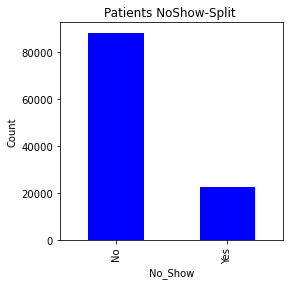

In [32]:
df['noshow'].value_counts().plot.bar(figsize = (4,4), title = 'Patients NoShow-Split ', color = 'b')
plt.xlabel('No_Show')
plt.ylabel('Count');

In [33]:
df.noshow.value_counts()


No     88203
Yes    22316
Name: noshow, dtype: int64

In [34]:
def CreateBarGraph(list1, color1):
    plt.figure(1)
    cols = list1
    colour = color1
    i = 0
    for col in cols:    
        plt.subplot(int(str(22)+str((cols.index(col)+1))))
        df[col].value_counts(normalize=True).plot.bar(figsize=(20,15), fontsize = 10.0, color = colour[i])
        plt.title(col +' vs count%', fontweight="bold", fontsize = 22.0)
        plt.ylabel('Count %', fontsize = 20.0)
        plt.xlabel(col, fontsize=20.0)
        i = i +1 
    

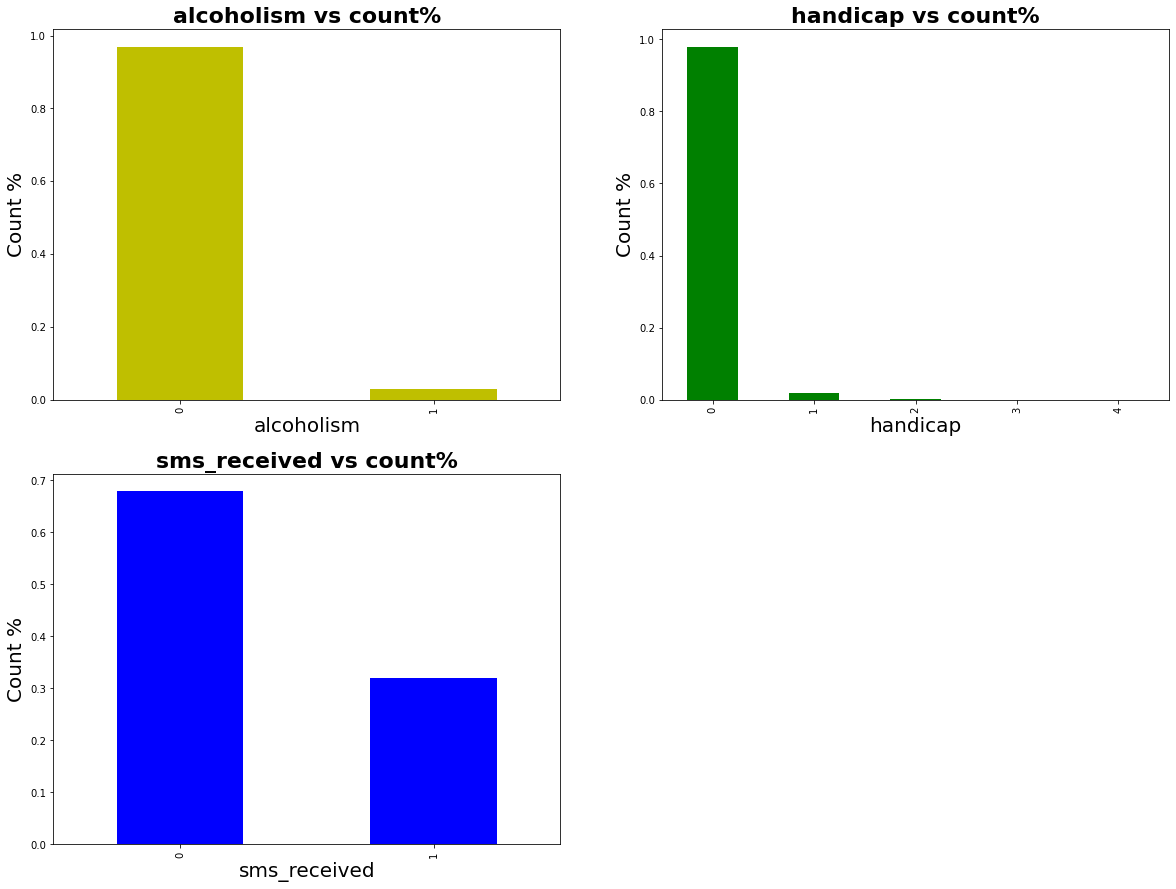

In [35]:
CreateBarGraph(['alcoholism','handicap','sms_received'],['y', 'g', 'b'])


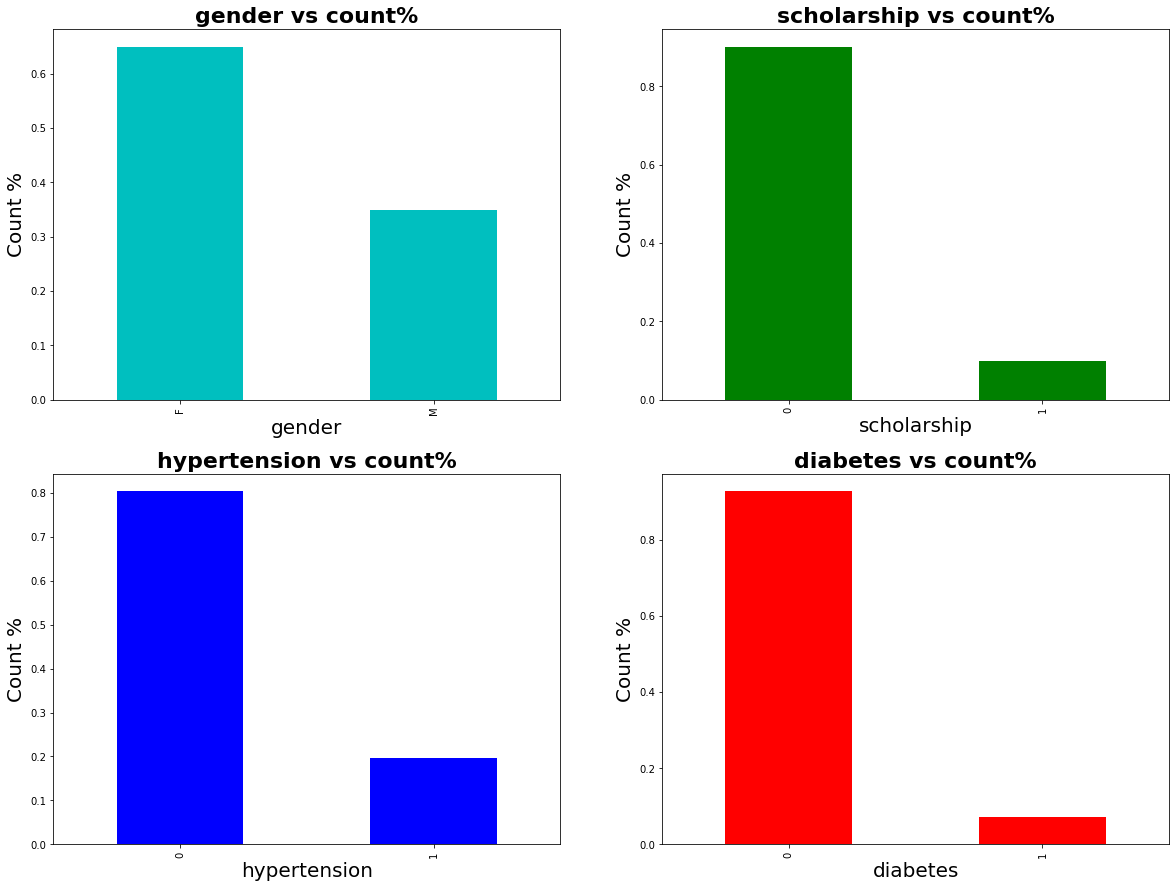

In [36]:
CreateBarGraph(['gender', 'scholarship', 'hypertension', 'diabetes'],['c', 'g', 'b', 'r'])


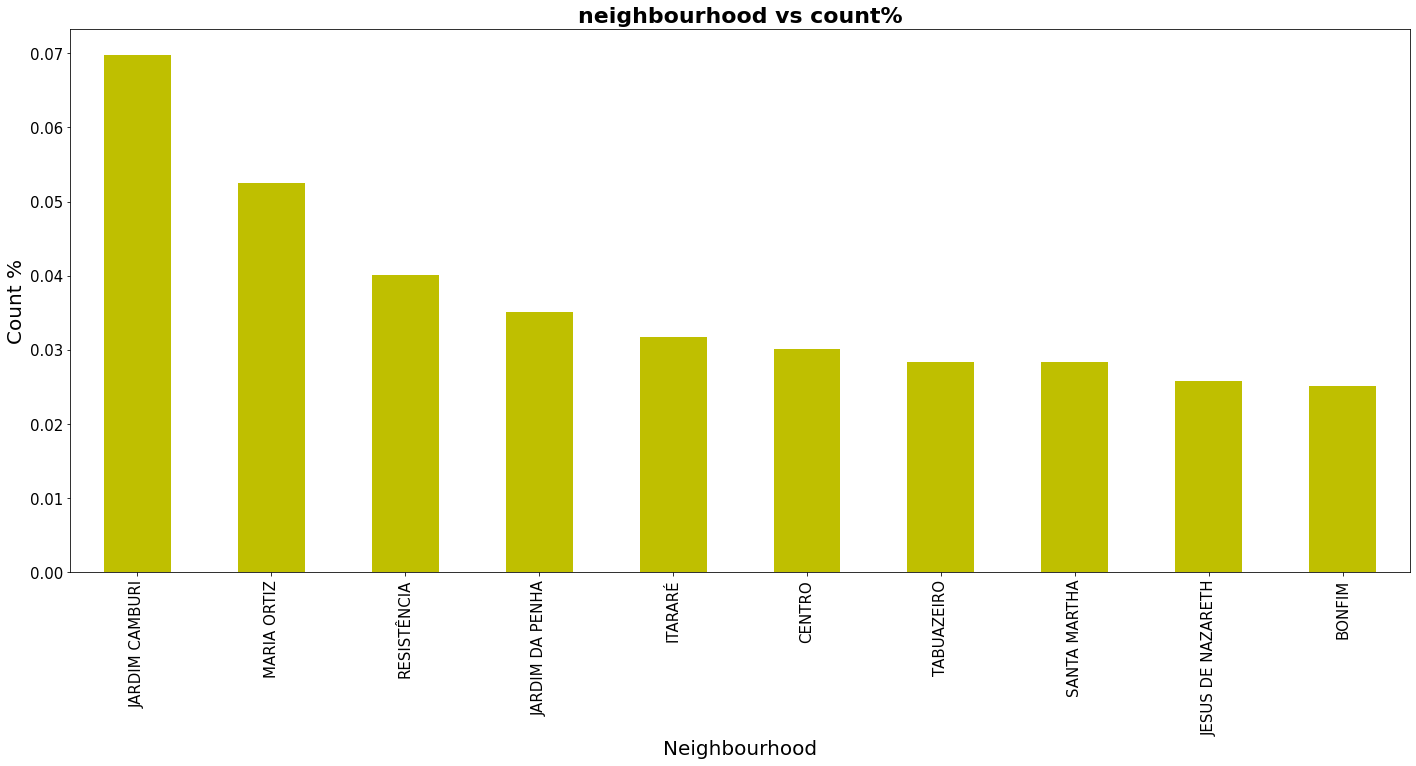

In [37]:
df['neighbourhood'].value_counts(normalize=True).sort_values(ascending = False)[:10].plot.bar(figsize=(24,10), fontsize = 15.0, color = 'y')
plt.title('neighbourhood vs count%', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)
plt.xlabel('Neighbourhood', fontsize = 20.0)
plt.show()

In [38]:
#to create dist and box plot
def dist_box_plot(param,title1,y1):
    plt.figure(1)
    plt.subplot(121)
    sns.distplot(df[param]).set(title=title1, ylabel=y1)
    plt.subplot(122)
    df[param].plot.box(figsize=(16,5))
    plt.title(title1)
    plt.ylabel(y1)
    plt.show()

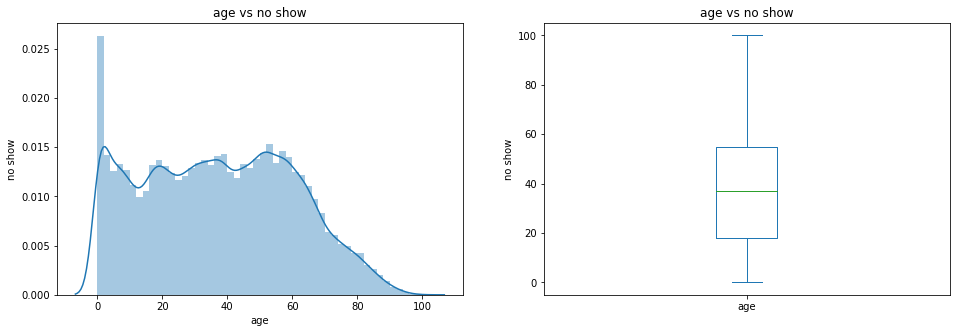

In [39]:
dist_box_plot('age',"age vs no show","no show")


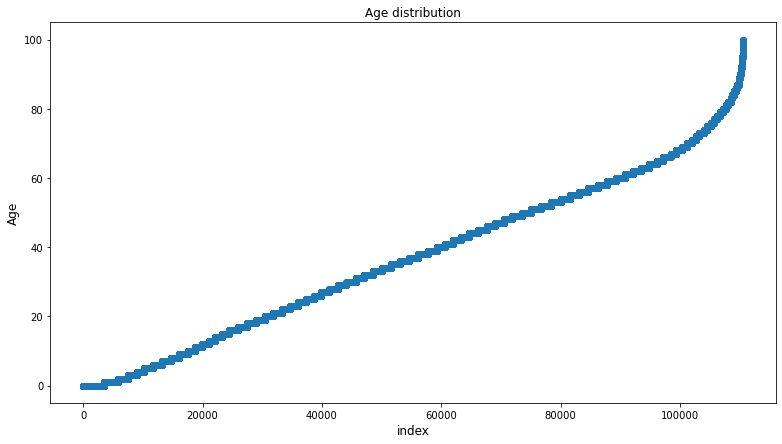

In [40]:
plt.figure(figsize=(13,7))
plt.scatter(range(df.shape[0]), np.sort(df.age.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Age distribution')
plt.show()

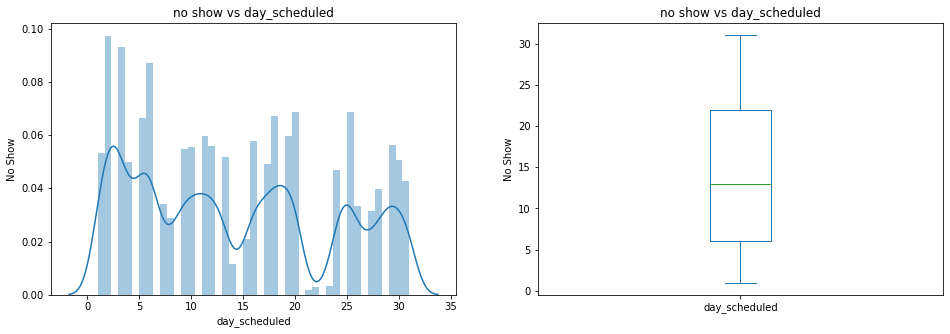

In [41]:
dist_box_plot('day_scheduled',"no show vs day_scheduled","No Show")


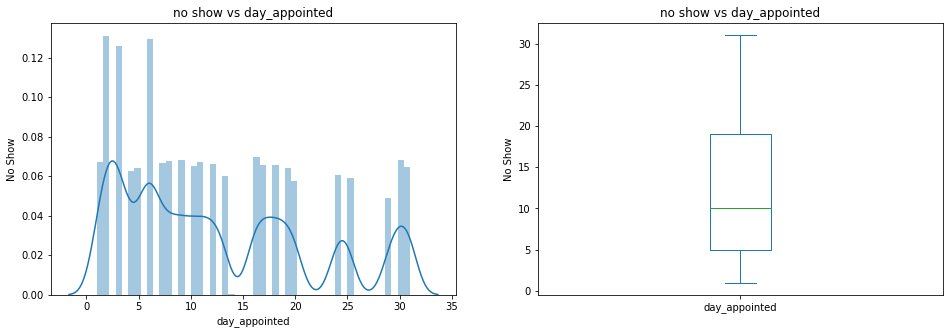

In [42]:
dist_box_plot('day_appointed',"no show vs day_appointed","No Show")


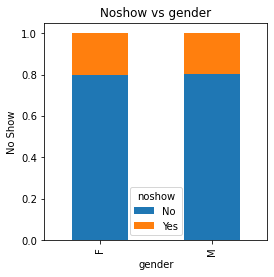

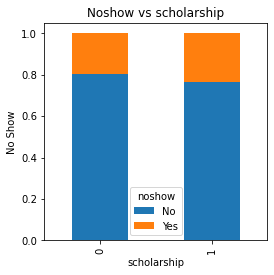

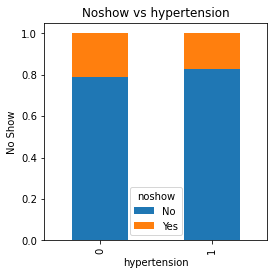

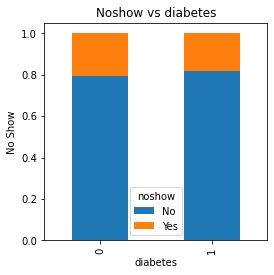

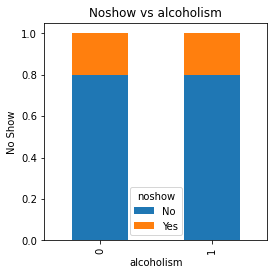

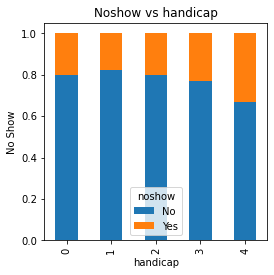

In [43]:
list1 = ['gender', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap']
for col in list1:
    col1 =pd.crosstab(df[col],df['noshow'])
    col1.div(col1.sum(1).astype(float), axis=0).plot(kind="bar",  stacked=True, figsize=(4,4)); 
    plt.title('Noshow vs '+col)
    plt.ylabel('No Show')

In [44]:
#check structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   patientid          110519 non-null  float64       
 1   appointmentid      110519 non-null  int64         
 2   gender             110519 non-null  object        
 3   scheduledday       110519 non-null  datetime64[ns]
 4   appointmentday     110519 non-null  datetime64[ns]
 5   age                110519 non-null  int64         
 6   neighbourhood      110519 non-null  object        
 7   scholarship        110519 non-null  int64         
 8   hypertension       110519 non-null  int64         
 9   diabetes           110519 non-null  int64         
 10  alcoholism         110519 non-null  int64         
 11  handicap           110519 non-null  int64         
 12  sms_received       110519 non-null  int64         
 13  noshow             110519 non-null  object  

In [45]:
#check for missing values
df.isnull().sum()

patientid            0
appointmentid        0
gender               0
scheduledday         0
appointmentday       0
age                  0
neighbourhood        0
scholarship          0
hypertension         0
diabetes             0
alcoholism           0
handicap             0
sms_received         0
noshow               0
day_scheduled        0
weekday_scheduled    0
month_scheduled      0
day_appointed        0
weekday_appointed    0
month_appointed      0
dtype: int64

In [46]:
df.drop(['patientid','appointmentid'],axis=1,inplace=True)


In [47]:
df.drop(['scheduledday','appointmentday'],axis=1,inplace=True)


In [48]:
#now check for the remaining columns
df.columns

Index(['gender', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'noshow',
       'day_scheduled', 'weekday_scheduled', 'month_scheduled',
       'day_appointed', 'weekday_appointed', 'month_appointed'],
      dtype='object')

In [49]:
#to check for which weekday is most favourable for appointments
df['weekday_appointed'].unique()

array([4, 1, 0, 2, 3, 5], dtype=int64)

[Text(0.5, 1.0, 'no show vs weekday_appointed'), Text(0, 0.5, 'No Show')]

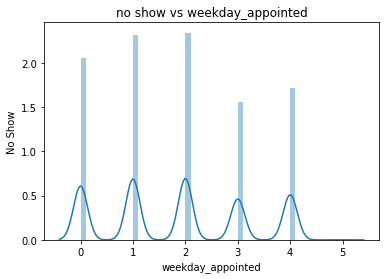

In [50]:
# The day of the week with Monday=0, Sunday=6
sns.distplot(df['weekday_appointed']).set(title="no show vs weekday_appointed", ylabel="No Show")


[Text(0.5, 1.0, 'no show vs weekday_scheduled'), Text(0, 0.5, 'No Show')]

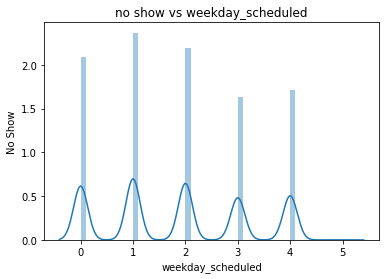

In [51]:
# The day of the week with Monday=0, Sunday=6
sns.distplot(df['weekday_scheduled']).set(title="no show vs weekday_scheduled", ylabel="No Show")


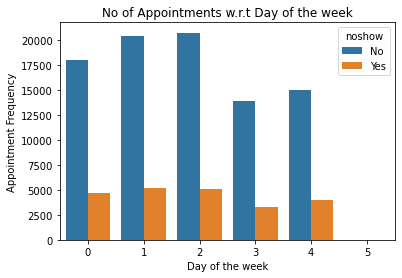

In [52]:
app_weekday = sns.countplot(x = 'weekday_appointed', hue = 'noshow', data = df)
app_weekday.set_title('No of Appointments w.r.t Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Appointment Frequency')
plt.show()

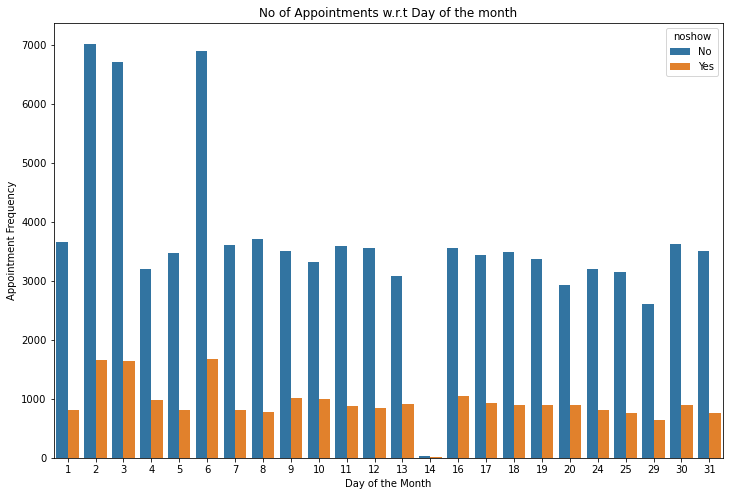

In [53]:
plt.figure(figsize = (12,8))
app_day = sns.countplot(x = 'day_appointed', hue = 'noshow', data = df)
app_day.set_title('No of Appointments w.r.t Day of the month')
plt.xlabel('Day of the Month')
plt.ylabel('Appointment Frequency')
plt.show()

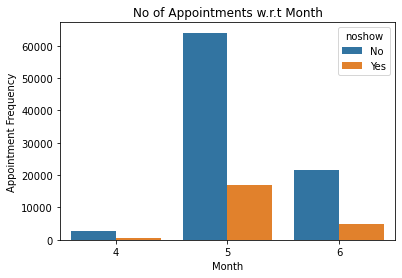

In [54]:
mon = sns.countplot(x = 'month_appointed', hue = 'noshow', data = df)
mon.set_title('No of Appointments w.r.t Month')
plt.xlabel('Month')
plt.ylabel('Appointment Frequency')
plt.show()

Text(0, 0.5, 'No Show')

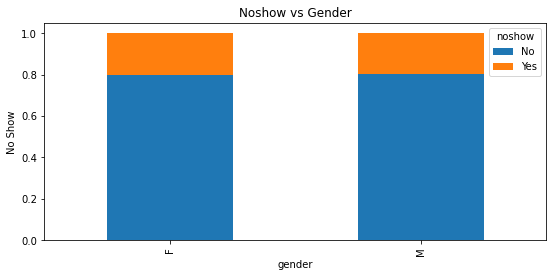

In [55]:
fig, ax = plt.subplots()
Gender=pd.crosstab(df['gender'],df['noshow'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(9,4),  ax = ax);
plt.title('Noshow vs Gender')
plt.ylabel('No Show')

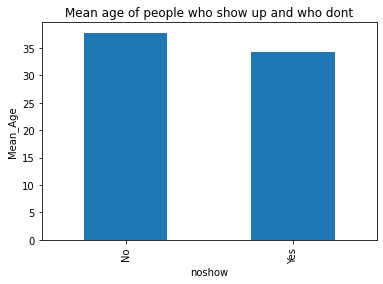

In [56]:
fig, ax = plt.subplots()
df.groupby('noshow')['age'].mean().plot.bar()
plt.ylabel('Mean_Age');
plt.title('Mean age of people who show up and who dont');

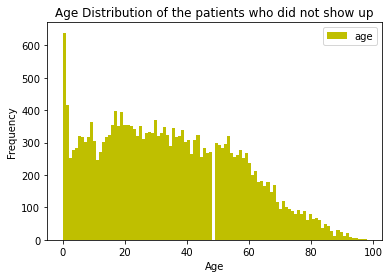

In [57]:
df_NoShow = df[df['noshow']  == "Yes"]
df_NoShow.plot(kind = "hist",y = "age",bins = 100, color = 'y') 
plt.title('Age Distribution of the patients who did not show up')
plt.xlabel('Age');


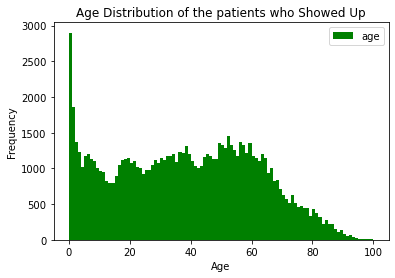

In [58]:
df_Show = df[df['noshow'] == "No"]
df_Show.plot(kind = "hist",y = "age",bins = 100, color = 'g') 
plt.title('Age Distribution of the patients who Showed Up')
plt.xlabel('Age')
plt.show()

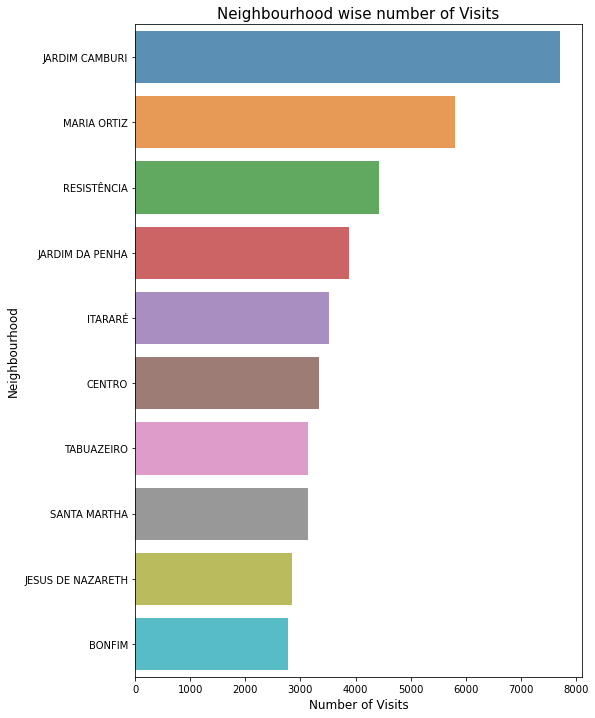

In [59]:
cnt_srs = df['neighbourhood'].value_counts().head(10)
plt.figure(figsize=(8,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Number of Visits', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)
plt.title("Neighbourhood wise number of Visits", fontsize=15)
plt.show()

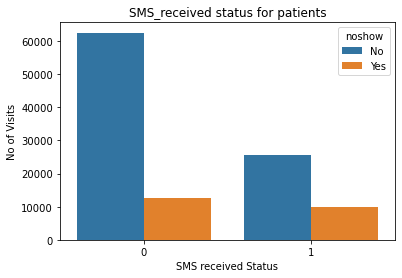

In [60]:
SMS = sns.countplot(x = 'sms_received', hue = 'noshow', data = df)
SMS.set_title('SMS_received status for patients')
plt.xlabel('SMS received Status')
plt.ylabel('No of Visits')
plt.show()

<Figure size 432x288 with 0 Axes>

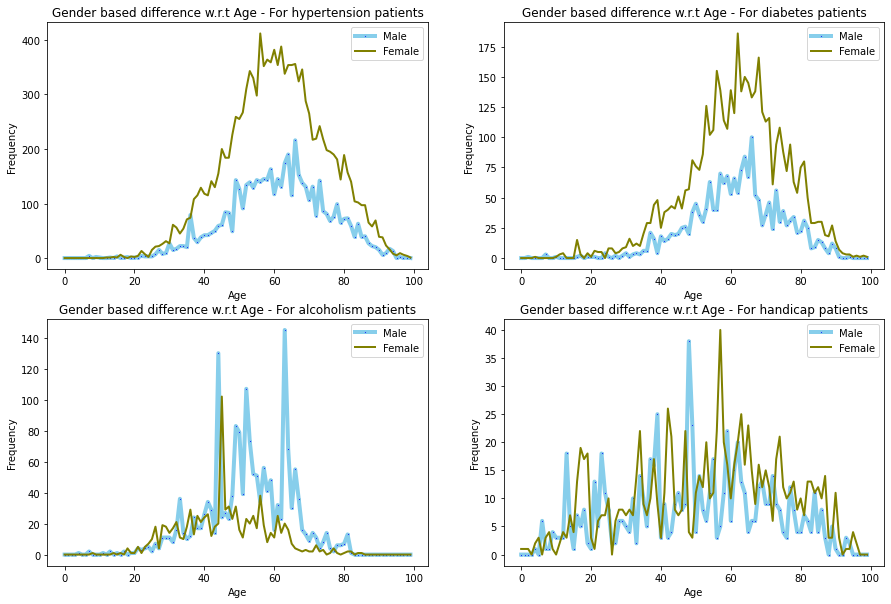

In [61]:
plt.figure(1)
plt.figure(figsize = (15,10))
iter_cols = ['hypertension', 'diabetes', 'alcoholism', 'handicap']
for col in iter_cols: 
    plt.subplot(int(str(22)+str((iter_cols.index(col)+1))))
    range_df = pd.DataFrame()
    range_df['age'] = range(100) 
    Male_Hyper = range_df.age.apply(lambda x:len(df[(df.age == x) & (df.gender == 'M') & (df[col] == 1) & (df.noshow == 'No') ]))
    Female_Hyper = range_df.age.apply(lambda x:len(df[(df.age == x) & (df.gender == 'F') & (df[col] == 1)& (df.noshow == 'No')]))

    # multiple line plot
    plt.plot( range_df, Male_Hyper, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=4)
    plt.plot( range_df, Female_Hyper, marker='', color='olive', linewidth=2)

    plt.legend(['Male','Female'])
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title('Gender based difference w.r.t Age - For {} patients'.format(col));


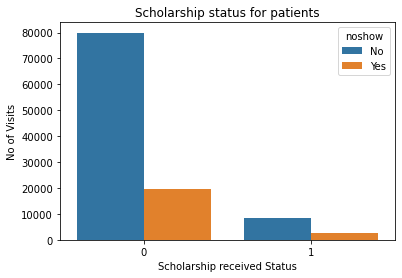

In [62]:
Scholar = sns.countplot(x = 'scholarship', hue = 'noshow', data = df)
Scholar.set_title('Scholarship status for patients')
plt.xlabel('Scholarship received Status')
plt.ylabel('No of Visits')
plt.show()